In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
plt.rcParams['figure.figsize'] = [20.0, 10.0]
sns.set_context('talk')  # fuentes más grandes

### Cambiar el origen de los datos a local (`03009sc.csv`) en caso de problemas de conectividad

In [4]:
csv_datos = 'http://www.ine.es/jaxi/files/_px/es/csv_sc/t20/e301/provi/03009.csv_sc'
# csv_datos = '03009sc.csv'

In [25]:
marriages = pd.read_csv(csv_datos,
                        sep=';', encoding='utf-8',
                        na_values='..',
                        header=[4, 5], index_col=0)[:-2]
marriages.drop(marriages.columns[-1], axis=1, inplace=True)

meses = marriages.columns.get_level_values(0)[0::5].values.repeat(5)
marriages.columns = pd.MultiIndex.from_tuples(zip(meses, marriages.columns.get_level_values(1)))

uniprovinciales = ['Cantabria', 'Rioja, La', 'Murcia', 'Asturias', 'Navarra', 'Balears, Illes', 'Madrid']
provincias_g = ['Gipuzkoa', 'Girona', 'Cádiz', 'Granada', 'Guadalajara']

df = marriages.Total.loc[uniprovinciales]

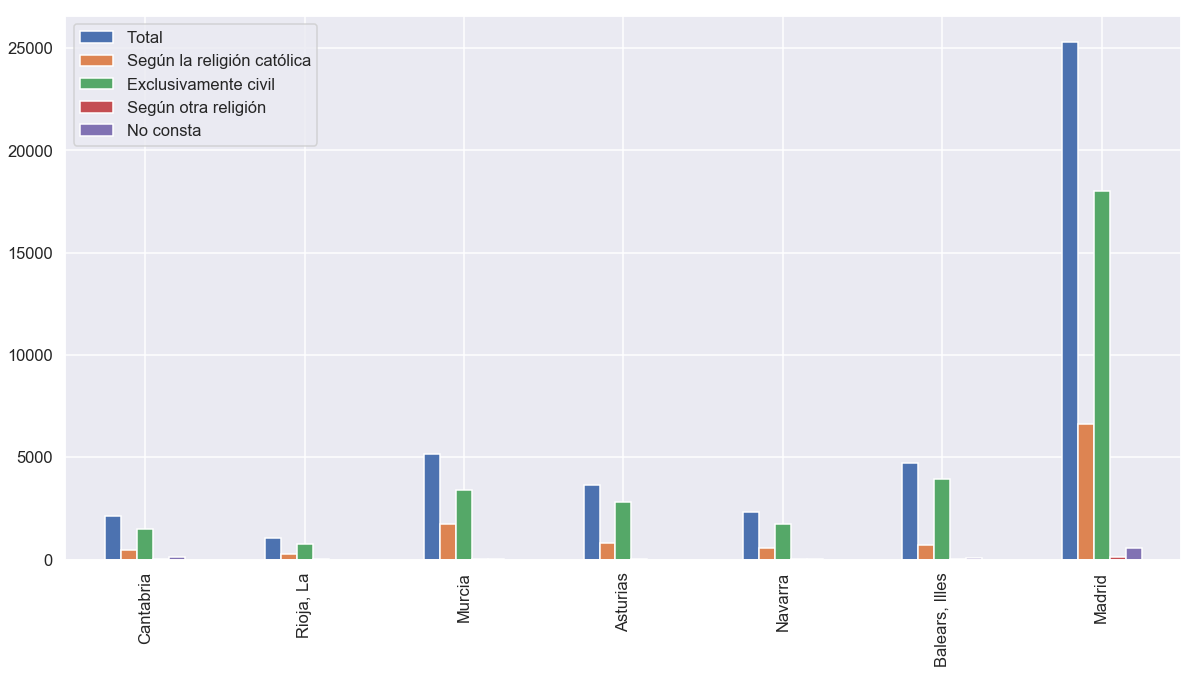

In [26]:
df.plot.bar();

## 1 - Crea una figura con 2 subplots (uno junto al otro) y dibuja los gráficos de barras para `uniprovinciales` y `provincias_g`

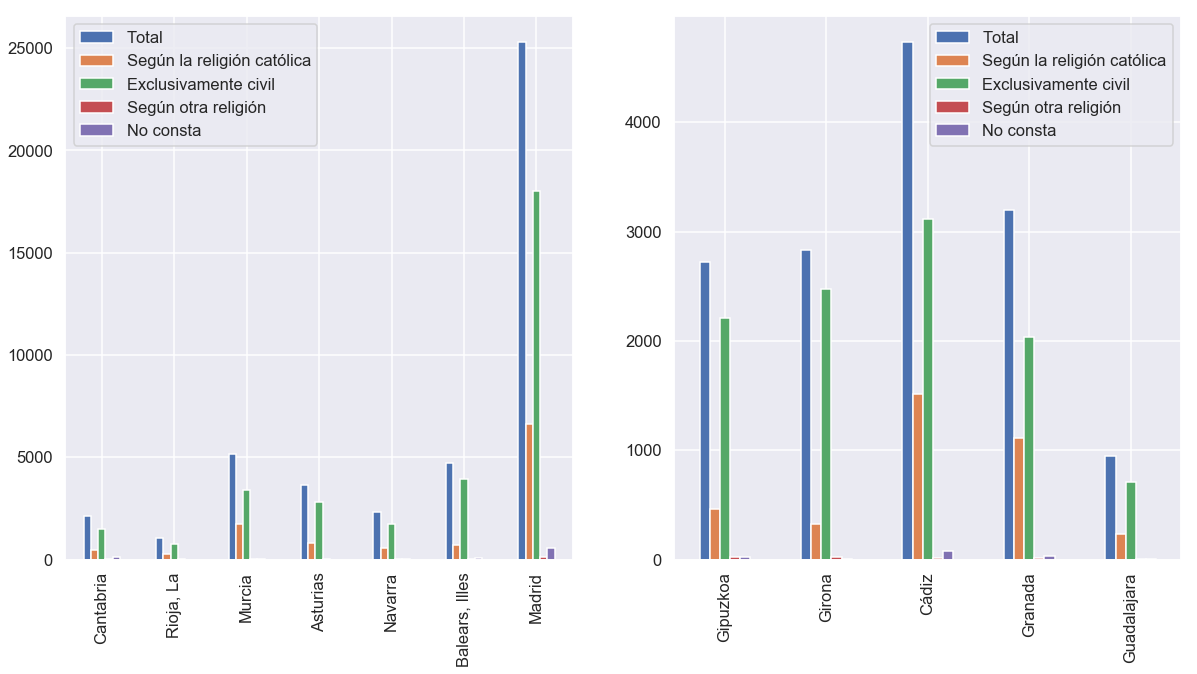

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

df.plot.bar(ax=ax1)
marriages.Total.loc[provincias_g].plot.bar(ax=ax2);

## 2 - Representa la evolución anual para cada provincia de (`datos_meses`)

- Eje 'x': tiempo
- Eje 'y': Total de matrimonios
- **`[BONUS #1]`**: Excluir datos de Madrid
- **`[BONUS #2]`** Estilo de línea: contínua con marcadores en 'v'

In [8]:
df = marriages.loc[uniprovinciales]
datos_meses = df.iloc[:, df.columns.get_level_values(1)=='Total']  # solo matrimonios totales
datos_meses = datos_meses.drop(datos_meses.columns[-1], axis=1)  # elimina suma anual
datos_meses.columns = datos_meses.columns.get_level_values(0)  # elimina multiindex en columnas

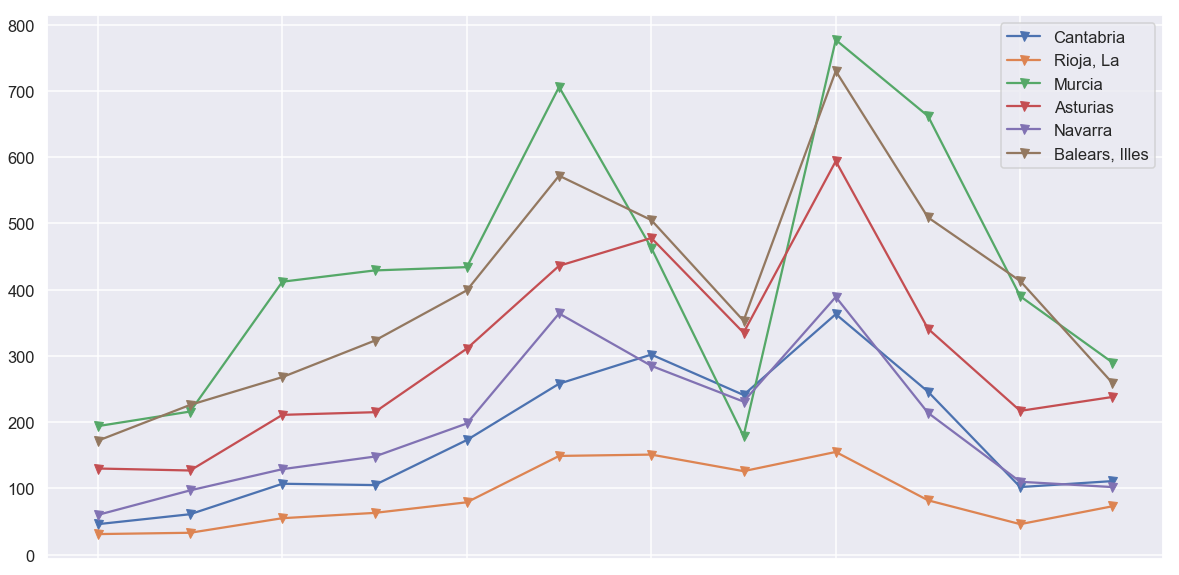

In [9]:
# datos_meses.T.plot();
# datos_meses.drop('Madrid').T.plot();
ax=datos_meses.drop('Madrid').T.plot(style='-v')
# ax.set_xticklabels(dd.index);

### 2.2 Repetir con un gráfico por provincia colocadas una junto a la otra (usar `layout`)

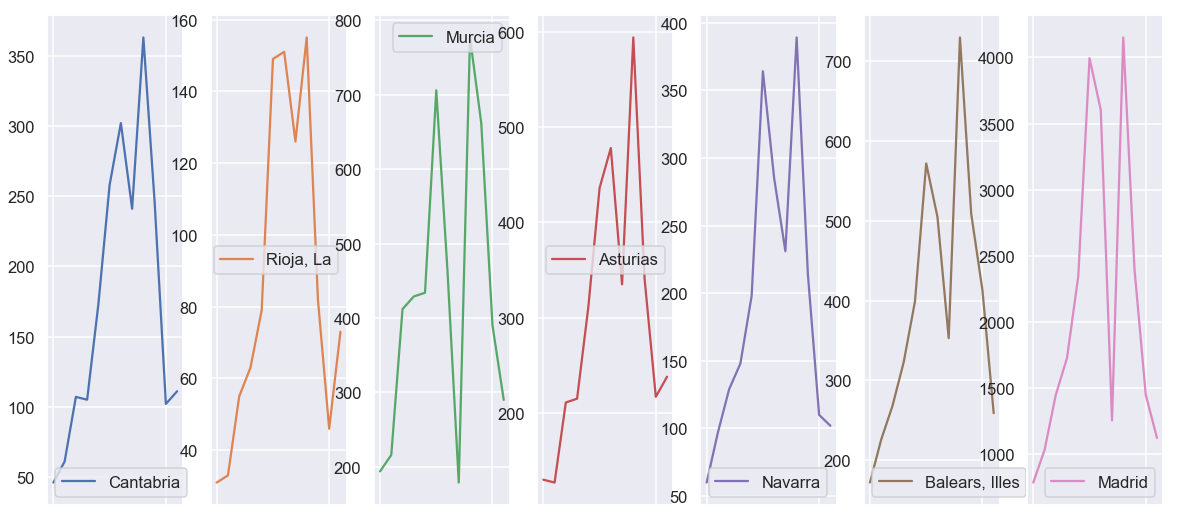

In [10]:
datos_meses.T.plot(
    subplots=True,
    layout=(1, len(datos_meses))
);

## 3 - Mismo gráfico que en `2.2`, pero compartiendo el eje 'y'

- **`[BONUS #1]`**: excluir datos de Madrid
- **`[BONUS #2]`**: dibujar una marca en el eje de abcisas cada 3 meses

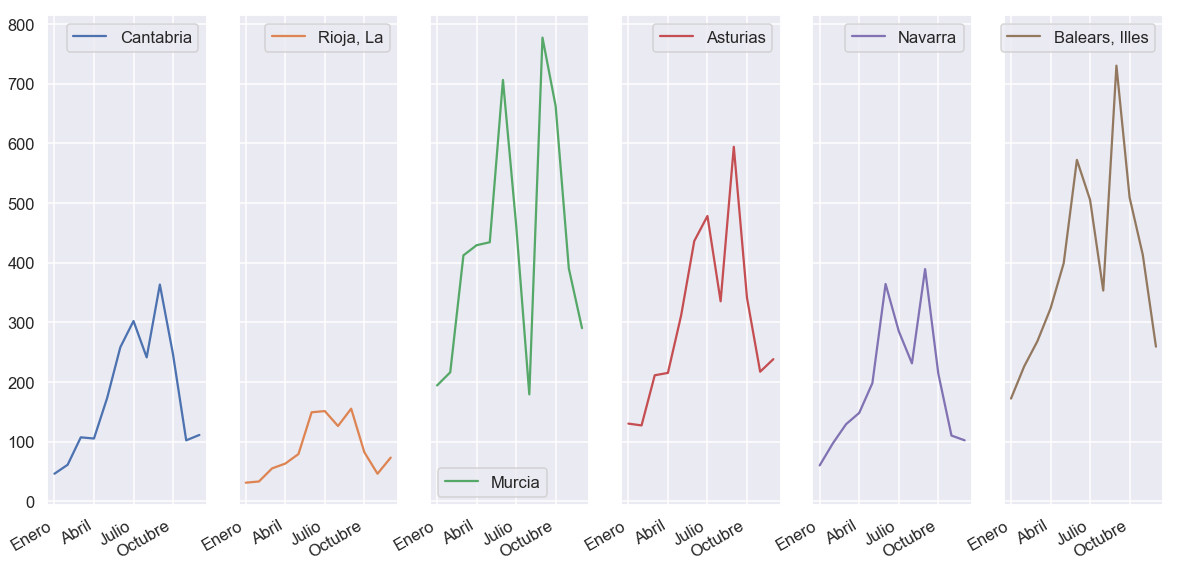

In [11]:
# datos_meses.T.plot(
#     subplots=True,
#     layout=(1, len(datos_meses)),
#     sharey=True
# );

# meses = datos_meses.columns.get_level_values(0)
# datos_meses.drop('Madrid').T.plot(
#     subplots=True,
#     layout=(1, len(datos_meses) - 1),
#     sharey=True
# );

meses = datos_meses.columns.get_level_values(0)
datos_meses.drop('Madrid').T.plot(
    subplots=True,
    layout=(1, len(datos_meses) - 1),
    sharey=True,
    xticks=range(0, 12, 3)
);

## 4 - Nombrar cada gráfico de (3) con un título

- **`[BONUS]`**: Establecer una nota (título) global para toda la figura
  `plt.gca().get_figure()` obtiene la referencia a la figura

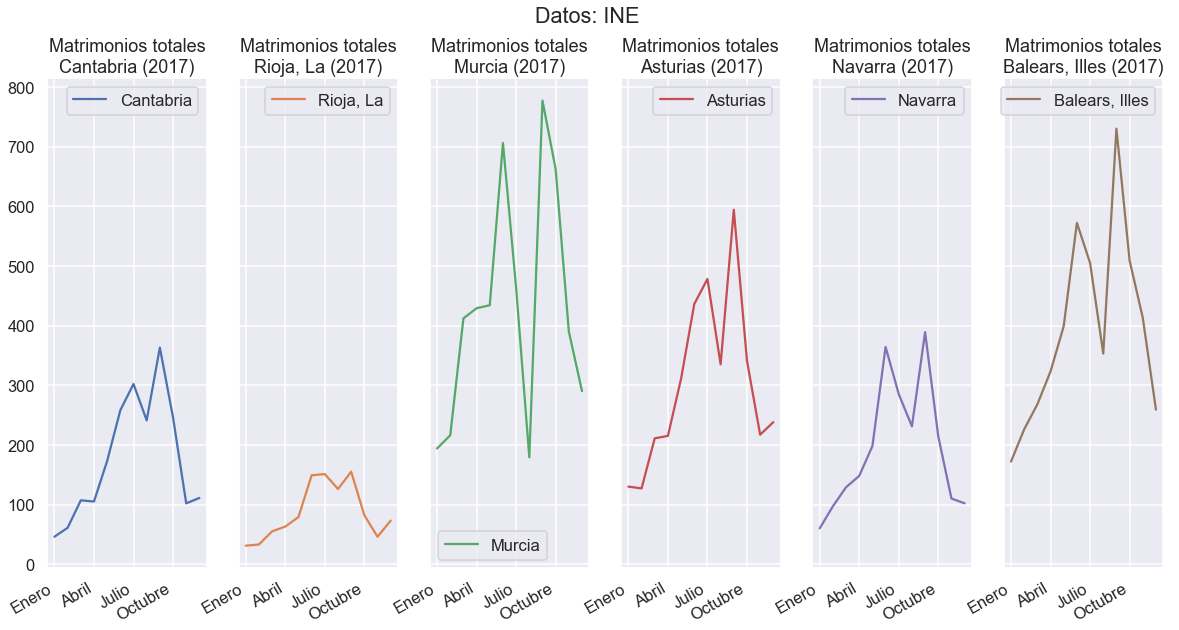

In [12]:
datos_meses.drop('Madrid').T.plot(
    subplots=True,
    layout=(1, len(uniprovinciales) - 1),
    sharey=True,
    xticks=range(0, 12, 3),
#     title='Matrimonios totales en uniprovinciales (excl. Madrid) - 2017',
    title=[f'Matrimonios totales\n{prov} (2017)' for prov in uniprovinciales if prov is not 'Madrid']
)

plt.gca().get_figure().suptitle('Datos: INE');

## 5 - Crear un gráfico de área con los datos de Cantabria

- Establecer un tamaño de 12 pulgadas de ancho por 8 de alto
- Excluir la columna de datos totales

In [13]:
datos_cantabria= marriages.loc['Cantabria'].drop('Total', level=0)
datos_cantabria = datos_cantabria.unstack().reindex(pd.unique(datos_cantabria.index.get_level_values(0)))
datos_cantabria

,Exclusivamente civil,No consta,Según la religión católica,Según otra religión,Total
Enero,40.0,3.0,2.0,1.0,46.0
Febrero,54.0,4.0,2.0,1.0,61.0
Marzo,88.0,10.0,8.0,1.0,107.0
Abril,82.0,7.0,16.0,NaN,105.0
Mayo,134.0,13.0,25.0,1.0,173.0
Junio,193.0,12.0,51.0,2.0,258.0
Julio,191.0,21.0,89.0,1.0,302.0
Agosto,152.0,22.0,66.0,1.0,241.0
Septiembre,232.0,11.0,115.0,5.0,363.0
Octubre,172.0,21.0,53.0,NaN,246.0


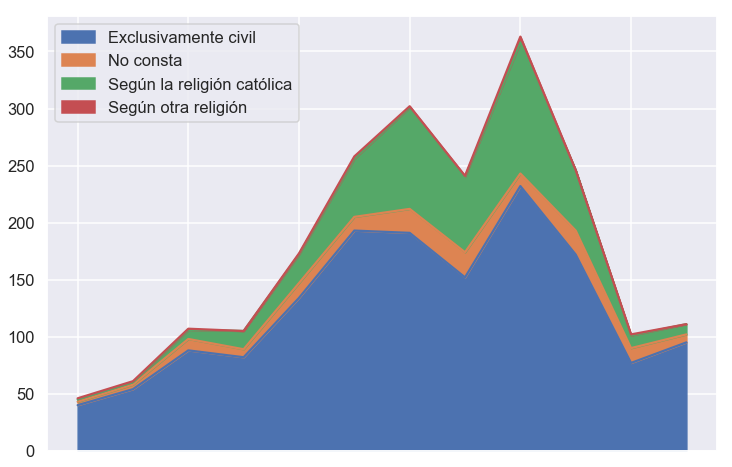

In [14]:
datos_cantabria.drop('Total', axis=1).plot.area(
    figsize=(12, 8)
);

## 6 - Repetir el gráfico anterior sin datos apilados

- Datos apilados por defecto

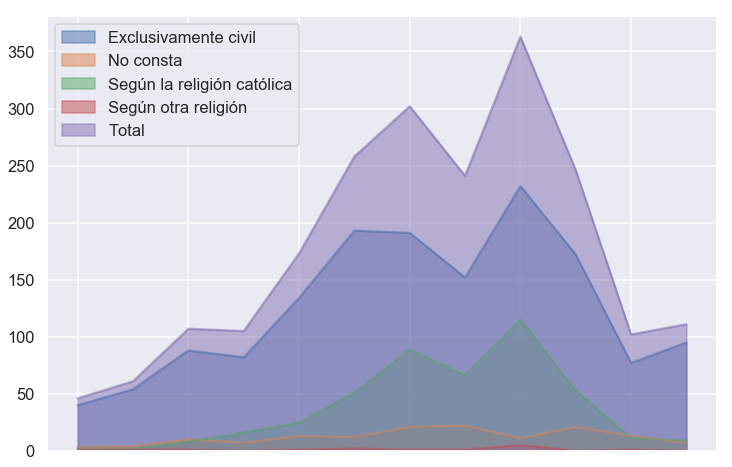

In [15]:
(fig, ax) = plt.subplots()

datos_cantabria.plot.area(
    figsize=(12, 8),
    stacked=False,
    ax=ax
);

## 7 - Crear un diagrama de cajas (`boxplot`) sin cuadrícula

- Usar un tamaño de 8 por 6 pulgadas

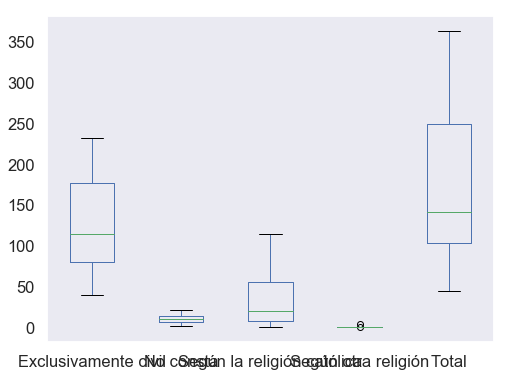

In [16]:
datos_cantabria.boxplot(
    grid=False,
    figsize=(8, 6)
);

## 8 - Repetir el diagrama anterior girando los valores del eje 'x'

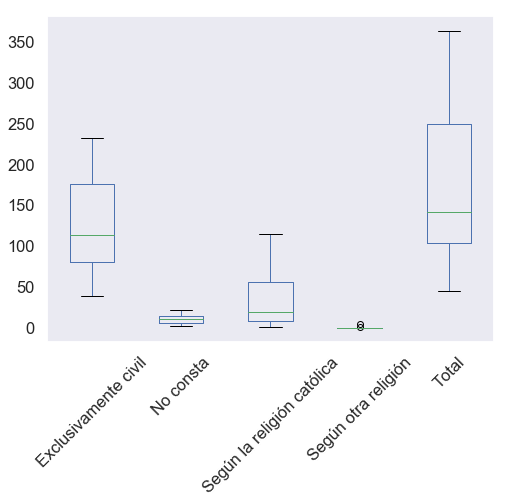

In [17]:
datos_cantabria.boxplot(
    grid=False,
    figsize=(8, 6),
    rot=45
);

## 9 - Ajustar los ejes en el gráfico generado en `2`

- Eje 'x' entre 0 y 11 (0=Enero, 11=Diciembre)
- Eje 'y' entre 0 y 1000
- Sin cuadrícula
- **`[BONUS]`**: Leyenda en la parte superior izquierda
- **`[BONUS]`**: añadir marcas en el eje 'x' cada 2 meses

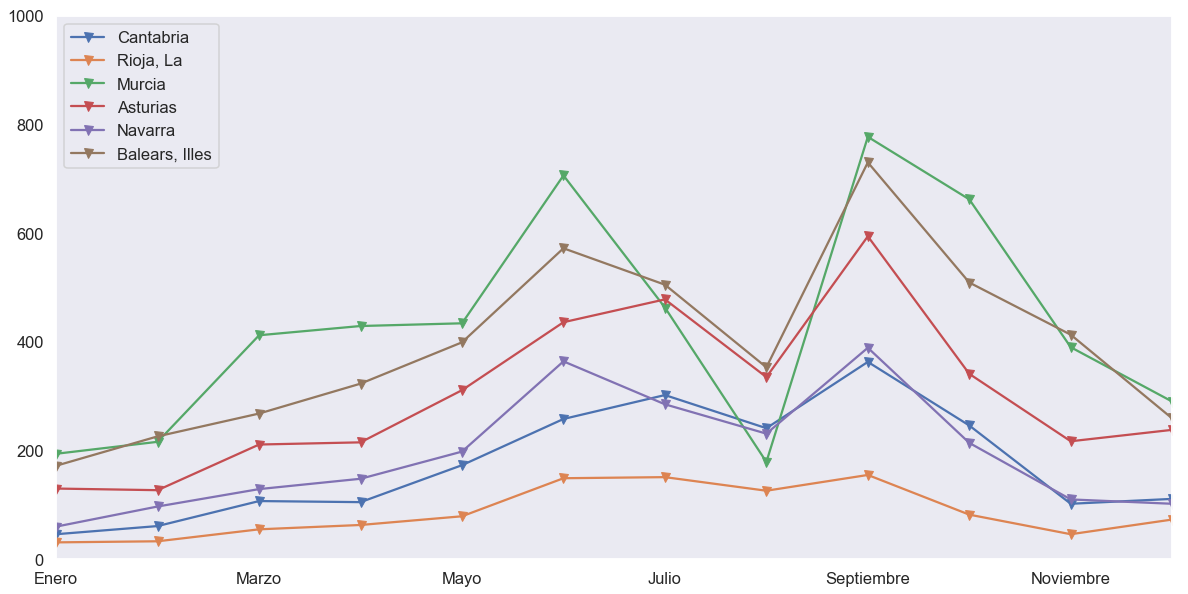

In [18]:
ax = datos_meses.drop('Madrid').T.plot(
    style='-v',
    xlim=(0, 11),
    ylim=(0, 1000),
    xticks=range(0, 12, 2),
    grid=False
)

ax.legend(loc='upper left');


## 10 - Cambiar el mapa de colores del gráfico anterior

In [19]:
# Lista de mapas de colores disponibles
# colores invertidos: nombre_r (ejemplo: 'Blues_r')

print([cm for cm in plt.cm.datad if not cm.endswith("_r")])

['Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c']


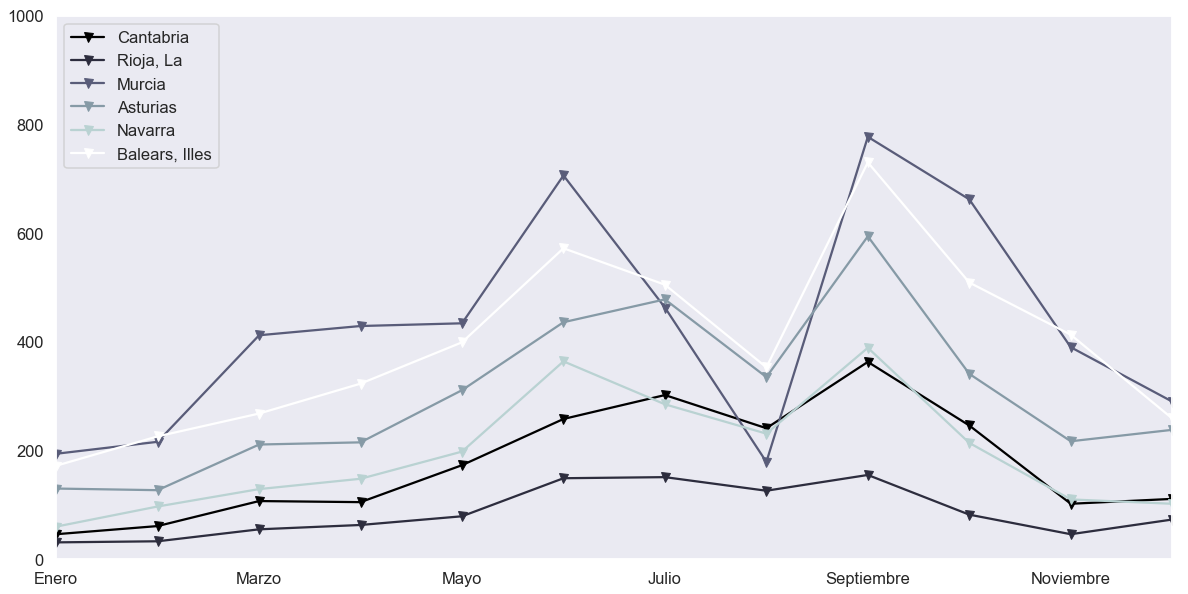

In [20]:
ax = datos_meses.drop('Madrid').T.plot(
    style='-v',
    xlim=(0, 11),
    ylim=(0, 1000),
    xticks=range(0, 12, 2),
    grid=False,
    cmap='bone',
)

ax.legend(loc='upper left');

## 11 - Añadir un segundo eje de ordenadas con los datos de Madrid

- Omitir el posicionamiento de la leyenda

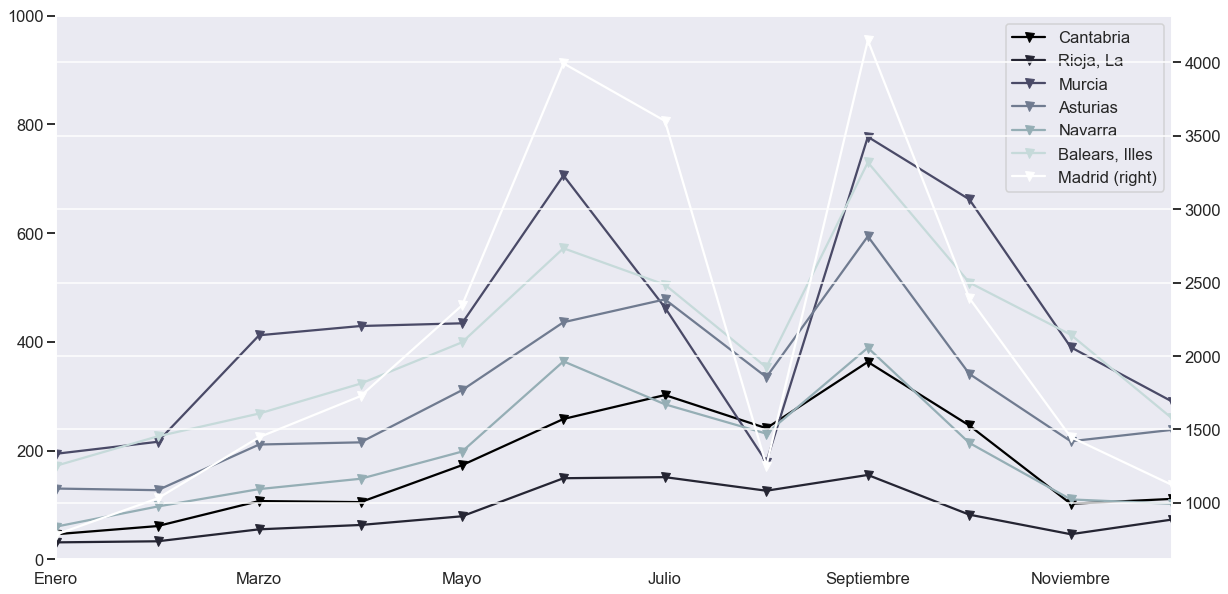

In [32]:
ax = datos_meses.T.plot(
    style='-v',
    xlim=(0, 11),
    ylim=(0, 1000),
    xticks=range(0, 12, 2),
    grid=False,
    cmap='bone',
    secondary_y='Madrid'
)

## 12 - Incluir los datos en el segundo gráfico generado en [1]

- **`[BONUS]`**: Elimina los ticks del eje 'x' (`set_xticklabels()`)

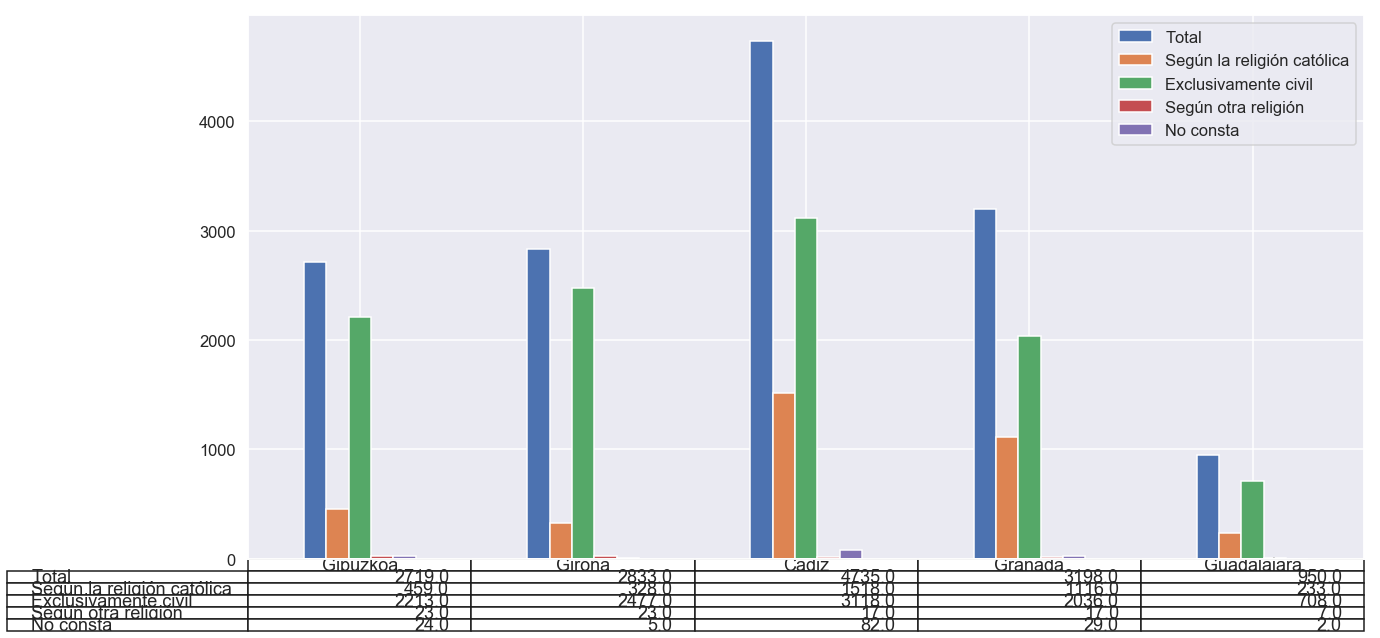

In [21]:
ax = marriages.Total.loc[provincias_g].plot.bar(table=True);
ax.set_xticklabels([]);

# BONUS

## Generar un gráfico circular con estilo 'xkcd' con los datos de Cantabria

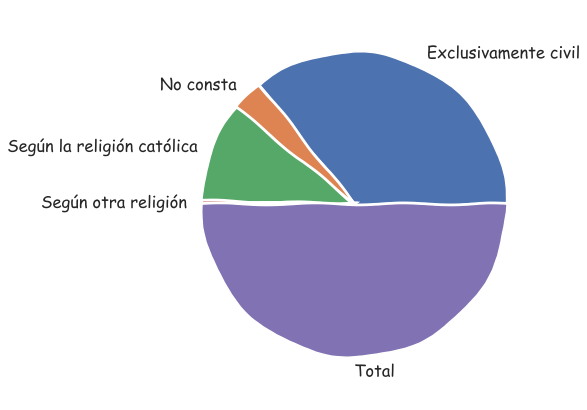

In [22]:
with plt.xkcd():
    ax = datos_cantabria.sum().plot.pie(figsize=(7, 7))
    ax.set_ylabel('')